In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [0]:
import csv
tweets = []
labels = []

with open("/tmp/train.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
      labels.append(int(row[4]))
      tweets.append(row[3])

In [8]:
num = 5
print(labels[num])
print(tweets[num])

1
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires


In [9]:
tokenizer = Tokenizer(lower=True,oov_token="NNNNNOOOTTTT")
tokenizer.fit_on_texts(tweets)
total_words = len(tokenizer.word_index) + 1
print(total_words)

22702


In [0]:
tweet_sequences = tokenizer.texts_to_sequences(tweets)
max_sequence_len = max([len(x) for x in tweet_sequences])

padded_tweet_sequences = pad_sequences(sequences=tweet_sequences, padding="post")

In [0]:
data_split = 6090
train_X = padded_tweet_sequences[0:data_split]
train_Y = labels[0:data_split]

test_X = padded_tweet_sequences[data_split:]
test_Y = labels[data_split:]

In [19]:
print(len(test_X))
print(len(test_Y))

1523
1523


In [12]:
print(tweets[0])
print(tokenizer)
print(max_sequence_len)
print(padded_tweet_sequences.shape)

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
33
(7613, 33)


In [16]:
model = Sequential([
                Embedding(total_words, 16, input_length=max_sequence_len),
                tf.keras.layers.GlobalAveragePooling1D(),
                Dense(24,activation="relu"),
                Dense(1,activation="sigmoid")
])
model.summary()
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 33, 16)            363232    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 363,665
Trainable params: 363,665
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(train_X,train_Y,epochs=100,validation_data=(test_X,test_Y),verbose=2)

Train on 6090 samples, validate on 1523 samples
Epoch 1/100
6090/6090 - 3s - loss: 0.6675 - acc: 0.5854 - val_loss: 0.6406 - val_acc: 0.6028
Epoch 2/100
6090/6090 - 1s - loss: 0.5475 - acc: 0.7578 - val_loss: 0.5284 - val_acc: 0.7761
Epoch 3/100
6090/6090 - 1s - loss: 0.3911 - acc: 0.8596 - val_loss: 0.4655 - val_acc: 0.8030
Epoch 4/100
6090/6090 - 1s - loss: 0.2834 - acc: 0.9020 - val_loss: 0.4457 - val_acc: 0.8102
Epoch 5/100
6090/6090 - 1s - loss: 0.2096 - acc: 0.9309 - val_loss: 0.4453 - val_acc: 0.8011
Epoch 6/100
6090/6090 - 1s - loss: 0.1569 - acc: 0.9493 - val_loss: 0.4573 - val_acc: 0.7951
Epoch 7/100
6090/6090 - 1s - loss: 0.1161 - acc: 0.9645 - val_loss: 0.4798 - val_acc: 0.7912
Epoch 8/100
6090/6090 - 1s - loss: 0.0876 - acc: 0.9736 - val_loss: 0.4981 - val_acc: 0.7892
Epoch 9/100
6090/6090 - 1s - loss: 0.0665 - acc: 0.9816 - val_loss: 0.5396 - val_acc: 0.7702
Epoch 10/100
6090/6090 - 1s - loss: 0.0529 - acc: 0.9854 - val_loss: 0.5549 - val_acc: 0.7741
Epoch 11/100
6090/609

<Figure size 432x288 with 0 Axes>

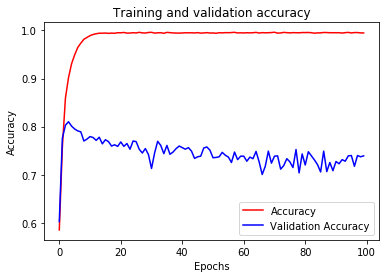

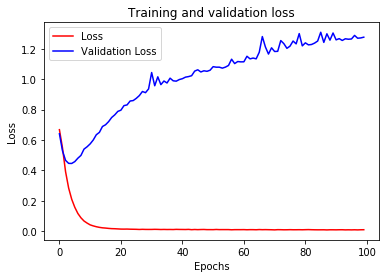

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()